In [1]:
import scipy.stats as scs
import numpy as np
import pandas as pd

# Sandwiches

## Objectives
- learn the laws of probability with sandwiches
- learn about random variables with sandwiches

In [2]:
np.random.seed(5002)
s_meat = np.random.choice(['turkey','ham','roast beef'], p=[0.5,0.2,0.3], size=12)
s_bread = np.random.choice(['white','wheat','dutch crunch'], p=[0.4,0.4,0.2], size=12)
s_cheese = np.random.choice(['Nope', 'Provolone', 'Cheddar'], p=[0.2, 0.3, 0.5], size=12)
s_mustard = np.random.choice([True, False], p=[0.75, 0.25], size=12)
s_price = np.random.randint(5,10, size=12)
s_mass = np.random.normal(0.5, 0.2, size=12).round(2)

sandwiches = pd.DataFrame(data={'meat':s_meat, 
                                'bread':s_bread, 
                                'cheese':s_cheese, 
                                'mustard?':s_mustard,
                                'price':s_price,
                                'mass':s_mass})

sandwiches.loc[sandwiches['cheese'] == 'Nope', 'price'] -= 1
sandwiches.loc[sandwiches['meat'] == 'roast beef', 'price'] += 1

sandwiches.loc[sandwiches['cheese'] == 'Nope', 'mass'] -= 0.1
sandwiches.loc[sandwiches['meat'] == 'roast beef', 'mass'] += 0.1



sandwiches

,bread,cheese,mass,meat,mustard?,price
0,wheat,Cheddar,0.41,ham,True,8
1,wheat,Cheddar,0.32,turkey,True,8
2,white,Cheddar,0.61,roast beef,True,9
3,white,Provolone,0.32,roast beef,False,6
4,wheat,Provolone,0.22,roast beef,True,8
5,white,Cheddar,0.60,roast beef,False,10
6,wheat,Nope,0.14,ham,True,8
7,white,Cheddar,0.26,turkey,True,5
8,wheat,Cheddar,0.74,roast beef,True,10
9,dutch crunch,Cheddar,0.75,roast beef,False,7


In [3]:
sandwiches.sort_values(['bread', 'cheese'])

,bread,cheese,mass,meat,mustard?,price
9,dutch crunch,Cheddar,0.75,roast beef,False,7
0,wheat,Cheddar,0.41,ham,True,8
1,wheat,Cheddar,0.32,turkey,True,8
8,wheat,Cheddar,0.74,roast beef,True,10
11,wheat,Cheddar,0.74,turkey,False,5
6,wheat,Nope,0.14,ham,True,8
4,wheat,Provolone,0.22,roast beef,True,8
2,white,Cheddar,0.61,roast beef,True,9
5,white,Cheddar,0.60,roast beef,False,10
7,white,Cheddar,0.26,turkey,True,5


`P(bread=wheat) = 6/12`

`P(bread=dutch) = 1/12`

`P(bread=white) = 5/12`

In [4]:
sandwiches.sort_values(['cheese', 'meat'])

,bread,cheese,mass,meat,mustard?,price
0,wheat,Cheddar,0.41,ham,True,8
10,white,Cheddar,0.93,ham,True,5
2,white,Cheddar,0.61,roast beef,True,9
5,white,Cheddar,0.60,roast beef,False,10
8,wheat,Cheddar,0.74,roast beef,True,10
9,dutch crunch,Cheddar,0.75,roast beef,False,7
1,wheat,Cheddar,0.32,turkey,True,8
7,white,Cheddar,0.26,turkey,True,5
11,wheat,Cheddar,0.74,turkey,False,5
6,wheat,Nope,0.14,ham,True,8


`P(cheese=ched) = 9/12`

`P(cheese=nope) = 1/12`

`P(cheese=prov) = 2/12`


In [5]:
sandwiches[sandwiches['cheese']=='Cheddar']

,bread,cheese,mass,meat,mustard?,price
0,wheat,Cheddar,0.41,ham,True,8
1,wheat,Cheddar,0.32,turkey,True,8
2,white,Cheddar,0.61,roast beef,True,9
5,white,Cheddar,0.60,roast beef,False,10
7,white,Cheddar,0.26,turkey,True,5
8,wheat,Cheddar,0.74,roast beef,True,10
9,dutch crunch,Cheddar,0.75,roast beef,False,7
10,white,Cheddar,0.93,ham,True,5
11,wheat,Cheddar,0.74,turkey,False,5


In [6]:
sandwiches[sandwiches['bread'] == 'white']

,bread,cheese,mass,meat,mustard?,price
2,white,Cheddar,0.61,roast beef,True,9
3,white,Provolone,0.32,roast beef,False,6
5,white,Cheddar,0.60,roast beef,False,10
7,white,Cheddar,0.26,turkey,True,5
10,white,Cheddar,0.93,ham,True,5


In [7]:
sandwiches[(sandwiches['bread'] == 'white') & (sandwiches['cheese']=='Cheddar')]

,bread,cheese,mass,meat,mustard?,price
2,white,Cheddar,0.61,roast beef,True,9
5,white,Cheddar,0.60,roast beef,False,10
7,white,Cheddar,0.26,turkey,True,5
10,white,Cheddar,0.93,ham,True,5


In [8]:
sandwiches[(sandwiches['bread'] == 'white') | (sandwiches['cheese']=='Cheddar')]

,bread,cheese,mass,meat,mustard?,price
0,wheat,Cheddar,0.41,ham,True,8
1,wheat,Cheddar,0.32,turkey,True,8
2,white,Cheddar,0.61,roast beef,True,9
3,white,Provolone,0.32,roast beef,False,6
5,white,Cheddar,0.60,roast beef,False,10
7,white,Cheddar,0.26,turkey,True,5
8,wheat,Cheddar,0.74,roast beef,True,10
9,dutch crunch,Cheddar,0.75,roast beef,False,7
10,white,Cheddar,0.93,ham,True,5
11,wheat,Cheddar,0.74,turkey,False,5


`P(white bread AND cheddar) = 4/12`

`P(white bread OR cheddar) = 10/12`

`P(white bread GIVEN cheddar) = 4/9`

Does `P(white OR cheddar) = P(white) + P(cheddar) - P(white AND cheddar)` add up?

Is the event `bread = white` independent of `cheese = cheddar`?

What about `bread = wheat` and `cheese = provolone`? Are they statistically independent events?

In [9]:
sandwiches

,bread,cheese,mass,meat,mustard?,price
0,wheat,Cheddar,0.41,ham,True,8
1,wheat,Cheddar,0.32,turkey,True,8
2,white,Cheddar,0.61,roast beef,True,9
3,white,Provolone,0.32,roast beef,False,6
4,wheat,Provolone,0.22,roast beef,True,8
5,white,Cheddar,0.60,roast beef,False,10
6,wheat,Nope,0.14,ham,True,8
7,white,Cheddar,0.26,turkey,True,5
8,wheat,Cheddar,0.74,roast beef,True,10
9,dutch crunch,Cheddar,0.75,roast beef,False,7


In [10]:
sandwiches[sandwiches['bread']=='wheat']

,bread,cheese,mass,meat,mustard?,price
0,wheat,Cheddar,0.41,ham,True,8
1,wheat,Cheddar,0.32,turkey,True,8
4,wheat,Provolone,0.22,roast beef,True,8
6,wheat,Nope,0.14,ham,True,8
8,wheat,Cheddar,0.74,roast beef,True,10
11,wheat,Cheddar,0.74,turkey,False,5


#### Sandwich exercises:

Let's say that I get to the deli right as it is closing, and those 12 sandwiches are the only ones remaining, pre-made, in the fridge.

Then I eat all 12 sandwiches and rank them based on how much I enjoyed them. My top three get, in order, my personal sandwich gold, silver, and bronze medals.

How many possible ways are there for me to award gold, silver, and bronze?


What if, instead of eating all 12 sandwiches, I just get 3 sandwiches at random. How many combinations of 3 sandwiches are there?

## Random Variables

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Our sandwiches have two numerical properties: price and mass. What kind of probabilistic questions can we ask about these properties?

In [12]:
sandwiches

,bread,cheese,mass,meat,mustard?,price
0,wheat,Cheddar,0.41,ham,True,8
1,wheat,Cheddar,0.32,turkey,True,8
2,white,Cheddar,0.61,roast beef,True,9
3,white,Provolone,0.32,roast beef,False,6
4,wheat,Provolone,0.22,roast beef,True,8
5,white,Cheddar,0.60,roast beef,False,10
6,wheat,Nope,0.14,ham,True,8
7,white,Cheddar,0.26,turkey,True,5
8,wheat,Cheddar,0.74,roast beef,True,10
9,dutch crunch,Cheddar,0.75,roast beef,False,7


In [13]:
price_counts = sandwiches['price'].value_counts().sort_index()

In [14]:
price_counts

5     3
6     1
7     1
8     4
9     1
10    2
Name: price, dtype: int64

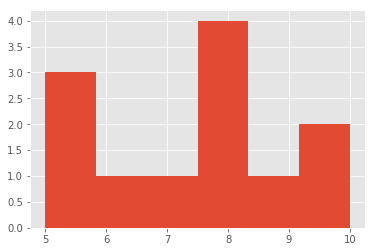

In [15]:
sandwiches['price'].hist(bins=6);

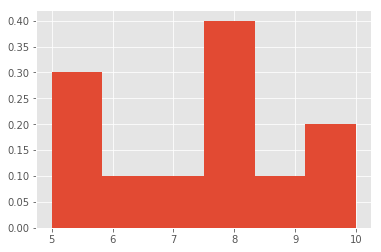

In [16]:
sandwiches['price'].hist(bins=6, normed=True);

In [17]:
prices = price_counts.index.values
counts = price_counts.values

In [18]:
prices

array([ 5,  6,  7,  8,  9, 10])

In [19]:
counts

array([3, 1, 1, 4, 1, 2])

In [20]:
probs = counts / counts.sum()

In [21]:
probs

array([ 0.25      ,  0.08333333,  0.08333333,  0.33333333,  0.08333333,
        0.16666667])

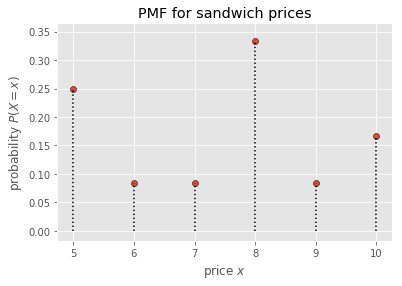

In [22]:
plt.scatter(prices, 
            probs,
            edgecolors='k')
plt.xlabel('price $x$')
plt.ylabel('probability $P(X=x)$')
plt.vlines(prices, 
           ymin=0, 
           ymax=probs,
           linestyle=':')
plt.title('PMF for sandwich prices');

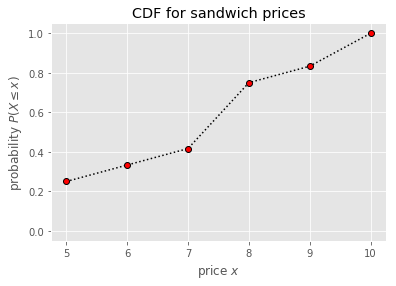

In [23]:
plt.plot(prices, 
         probs.cumsum(),
         'k:o',
         markerfacecolor='r')
plt.ylim([-0.05,1.05])
plt.xlabel('price $x$')
plt.ylabel(r'probability $P(X \leq x)$')
plt.title('CDF for sandwich prices');

### expectation value $E[X]$

In [24]:
prices

array([ 5,  6,  7,  8,  9, 10])

In [25]:
probs

array([ 0.25      ,  0.08333333,  0.08333333,  0.33333333,  0.08333333,
        0.16666667])

In [26]:
sum(x*px for x,px in zip(prices, probs))

7.4166666666666661

In [27]:
sandwiches['price']

0      8
1      8
2      9
3      6
4      8
5     10
6      8
7      5
8     10
9      7
10     5
11     5
Name: price, dtype: int64

### Law of large numbers

Let $X$ be a random variable that can take on the values $\{s_i\}$ with probabilities $P(X=s_i)$

$$E[X] = \sum_{i} s_i * P(X=s_i)$$

Say we have $N$ draws of this random variable $[X_1, X_2, X_3, \ldots, X_N]$
$$ \lim_{N\to\infty}\frac{1}{N}\sum_k X_k = E[X]$$

In [28]:
sample_sizes = np.logspace(0, 5, 50)
sample_means = [np.random.choice(sandwiches['price'], 
                                 size=int(i)).mean() 
                for i in sample_sizes]

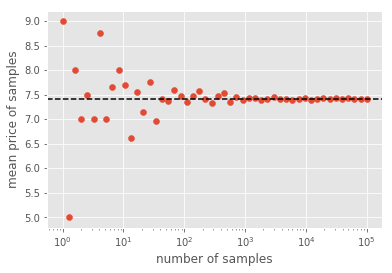

In [29]:
plt.scatter(sample_sizes, sample_means)
plt.xscale('log')
plt.axhline(sandwiches['price'].mean(), linestyle='--', color='k')
plt.xlabel('number of samples')
plt.ylabel('mean price of samples');

### a new random variable as a function of an old one: $Y \sim X^2$

In [30]:
prices_2 = prices**2

In [31]:
prices_2

array([ 25,  36,  49,  64,  81, 100])

In [32]:
probs

array([ 0.25      ,  0.08333333,  0.08333333,  0.33333333,  0.08333333,
        0.16666667])

In [33]:
sum(x*px for x,px in zip(prices_2, probs))

58.083333333333329

### variance of price: $Var(X) = E[(X - E[X])^2]$

In [34]:
prices

array([ 5,  6,  7,  8,  9, 10])

In [35]:
probs

array([ 0.25      ,  0.08333333,  0.08333333,  0.33333333,  0.08333333,
        0.16666667])

In [36]:
e_x = sum(x*px for x,px in zip(prices, probs))

In [37]:
e_x

7.4166666666666661

In [38]:
X_centered = prices - e_x

In [39]:
X_centered

array([-2.41666667, -1.41666667, -0.41666667,  0.58333333,  1.58333333,
        2.58333333])

In [40]:
Z = X_centered**2

In [41]:
Z

array([ 5.84027778,  2.00694444,  0.17361111,  0.34027778,  2.50694444,
        6.67361111])

In [42]:
probs

array([ 0.25      ,  0.08333333,  0.08333333,  0.33333333,  0.08333333,
        0.16666667])

In [43]:
e_Z = sum(z*pz for z,pz in zip(Z, probs))

In [44]:
e_Z

3.0763888888888888

In [45]:
# Variance
variance = sum(((x - e_x)**2)*px for x,px in zip(prices, probs))
variance

3.0763888888888888

In [46]:
# standard deviation
np.sqrt(variance)

1.7539637649874324

# Horses & Dogs

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [48]:
np.random.seed(216)

horse_wt = scs.distributions.norm(100,25).rvs(size=12)
dog_wt = scs.distributions.norm(60,10).rvs(size=12)
horse_color = np.random.choice(['white', 'black', 'brown'], p=[0.1, 0.3, 0.6], size=12)
dog_color = np.random.choice(['white', 'black', 'brown'], p=[0.4, 0.3, 0.3], size=12)
horse_ht = 0.05*horse_wt + scs.distributions.norm(0,1).rvs(size=12)
dog_ht = 0.02*dog_wt + scs.distributions.norm(0,1).rvs(size=12)

In [49]:
df_horse = pd.DataFrame(data={'weight':horse_wt, 'color':horse_color, 'height':horse_ht})
df_dog = pd.DataFrame(data={'weight':dog_wt, 'color':dog_color, 'height':dog_ht})

df_horse['animal'] = 'horse'
df_dog['animal'] = 'dog'

df = pd.concat([df_horse, df_dog]).sample(frac=1).reset_index(drop=True)

In [50]:
df.head(10)

,color,height,weight,animal
0,black,1.975001,65.428189,dog
1,brown,2.234386,46.541458,horse
2,brown,2.480195,65.980122,dog
3,white,5.621873,84.139520,horse
4,black,2.043669,58.688497,dog
5,black,4.618539,86.726109,horse
6,white,-0.537184,65.110658,dog
7,brown,1.412375,46.620397,dog
8,white,0.726663,52.927190,dog
9,black,6.971577,116.575449,horse


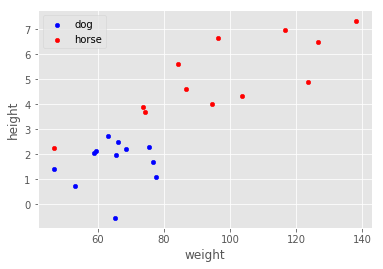

In [51]:
ax = df[df['animal']=='dog'].plot.scatter('weight','height', color='blue', label='dog')
df[df['animal']=='horse'].plot.scatter('weight','height', color='red', label='horse', ax=ax)
plt.legend();

In [52]:
df[(df['color']=='white')]

,color,height,weight,animal
3,white,5.621873,84.139520,horse
6,white,-0.537184,65.110658,dog
8,white,0.726663,52.927190,dog
11,white,2.288010,75.289859,dog
20,white,2.215331,68.325454,dog
23,white,1.683211,76.579886,dog


In [53]:
df[(df['animal']=='horse')]

,color,height,weight,animal
1,brown,2.234386,46.541458,horse
3,white,5.621873,84.139520,horse
5,black,4.618539,86.726109,horse
9,black,6.971577,116.575449,horse
10,brown,4.316814,103.697708,horse
12,black,4.915971,123.434038,horse
13,brown,3.890863,73.587133,horse
14,brown,7.333062,138.228909,horse
15,black,4.030712,94.478316,horse
17,brown,3.697125,74.212135,horse


In [54]:
horses = df[df['animal']=='horse']

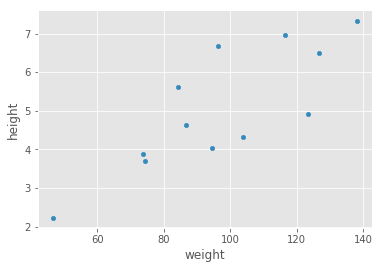

In [55]:
horses.plot.scatter('weight', 'height');

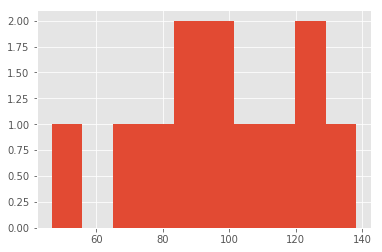

In [56]:
horses['weight'].hist();

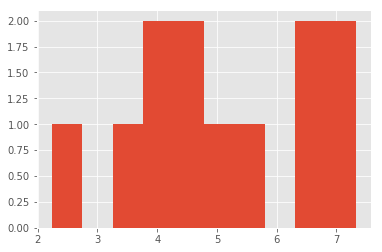

In [57]:
horses['height'].hist();

In [58]:
horses.head(10)

,color,height,weight,animal
1,brown,2.234386,46.541458,horse
3,white,5.621873,84.139520,horse
5,black,4.618539,86.726109,horse
9,black,6.971577,116.575449,horse
10,brown,4.316814,103.697708,horse
12,black,4.915971,123.434038,horse
13,brown,3.890863,73.587133,horse
14,brown,7.333062,138.228909,horse
15,black,4.030712,94.478316,horse
17,brown,3.697125,74.212135,horse


In [59]:
horses.corr()

,height,weight
height,1.000000,0.807156
weight,0.807156,1.000000
